# Census income

## Data Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

## Importing modules

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Read csv file

In [117]:
df = pd.read_csv('census.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_Status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [119]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [120]:
df.shape

(32560, 15)

## EDA

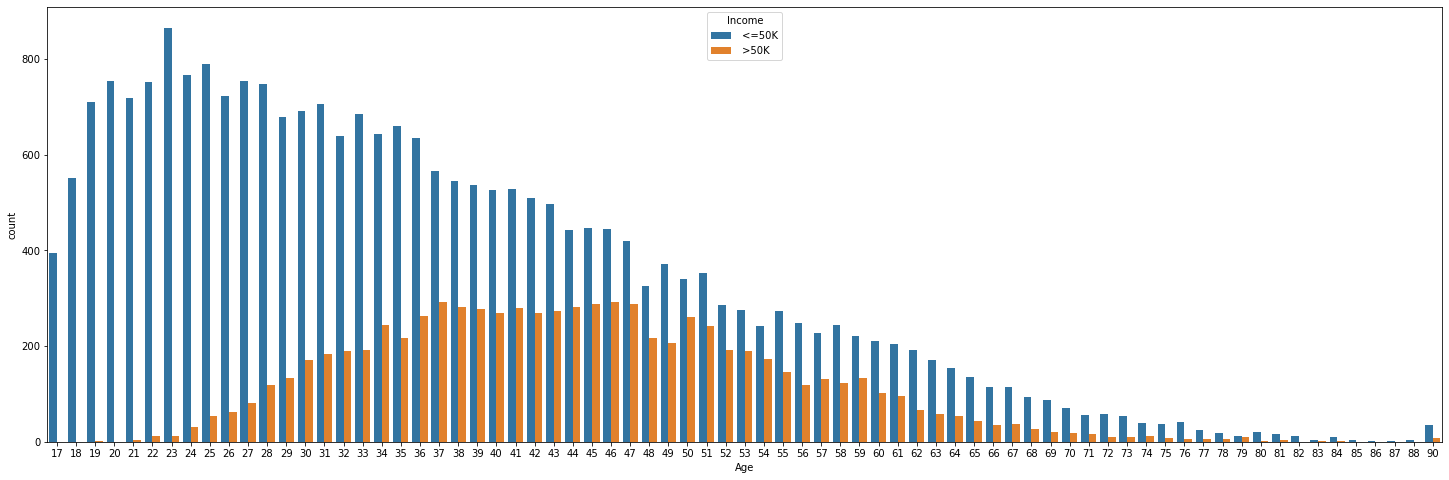

In [38]:
plt.figure(figsize=(25,8))
sns.countplot(x='Age', hue='Income', data=df)
plt.show()

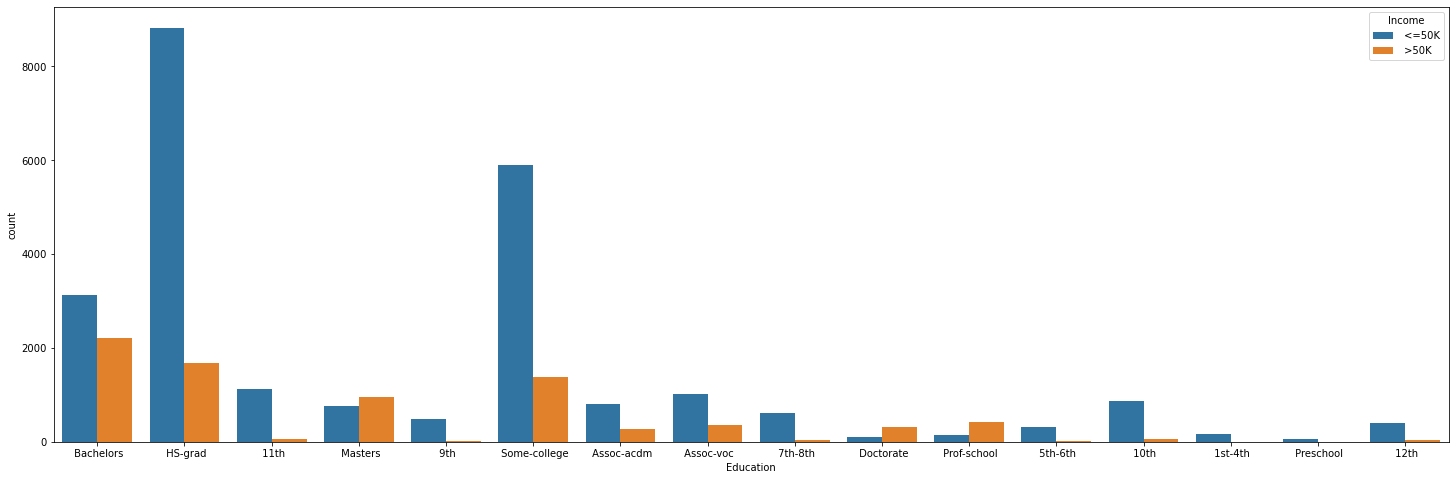

In [39]:
plt.figure(figsize=(25,8))
sns.countplot(x='Education', hue='Income', data=df)
plt.show()

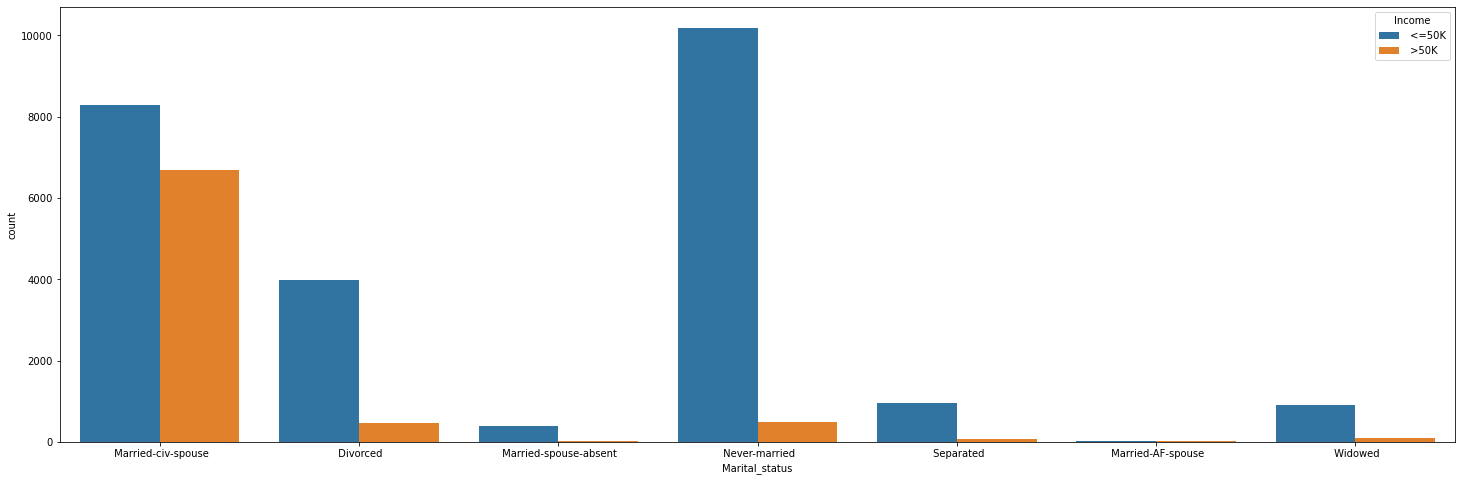

In [43]:
plt.figure(figsize=(25,8))
sns.countplot(x='Marital_status', hue='Income', data=df)
plt.show()

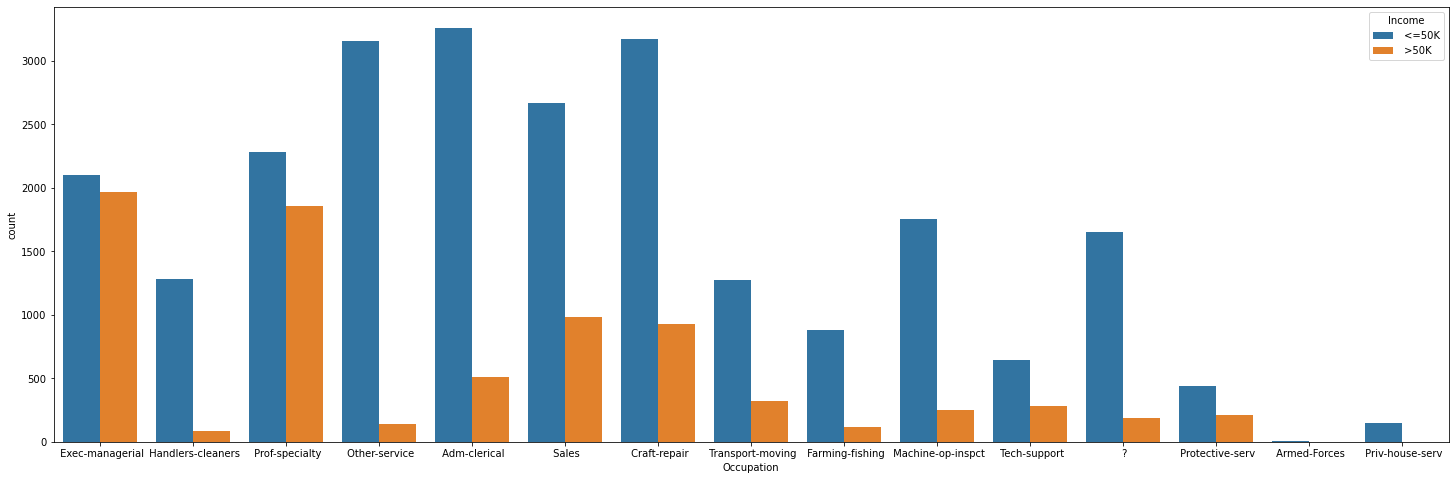

In [58]:
plt.figure(figsize=(25,8))
sns.countplot(x='Occupation', hue='Income', data=df)
plt.show()

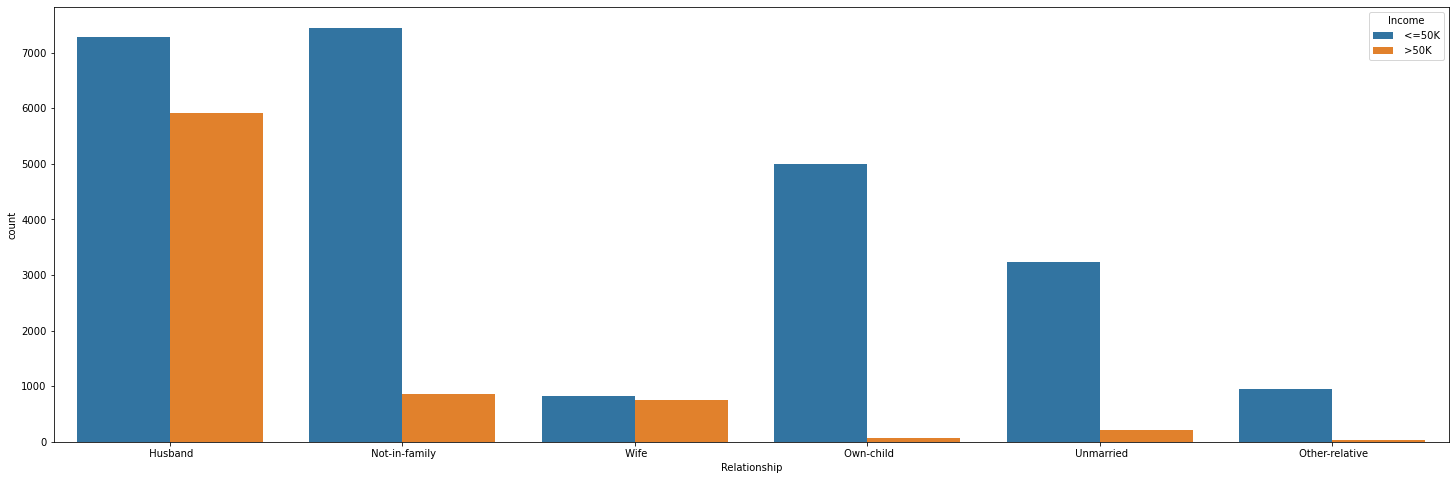

In [60]:
plt.figure(figsize=(25,8))
sns.countplot(x='Relationship', hue='Income', data=df)
plt.show()

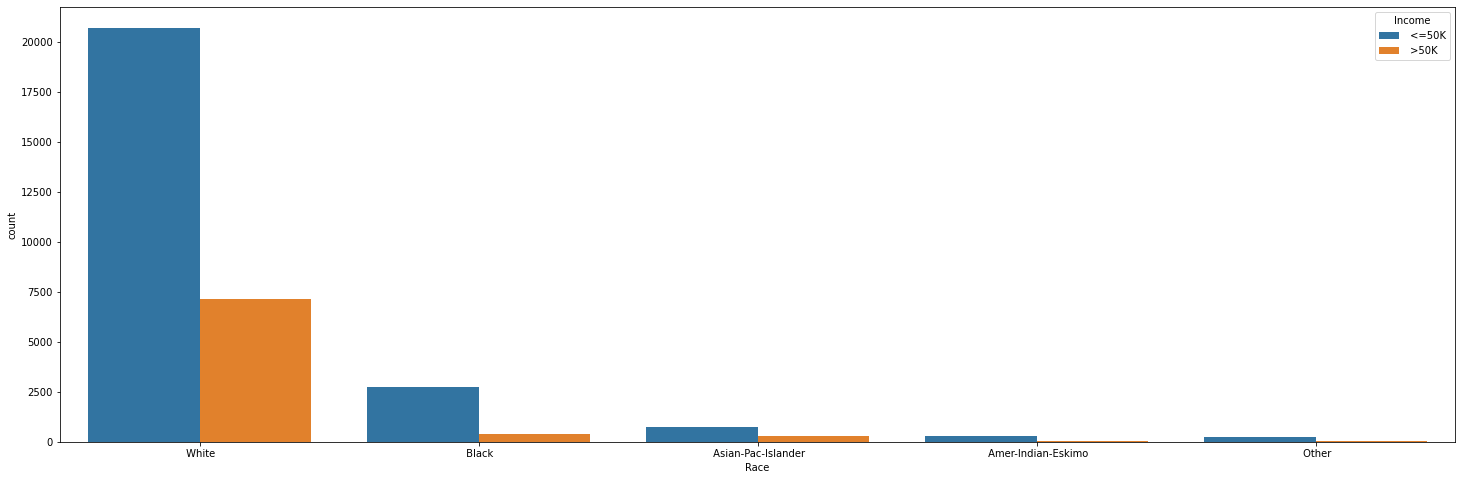

In [61]:
plt.figure(figsize=(25,8))
sns.countplot(x='Race', hue='Income', data=df)
plt.show()

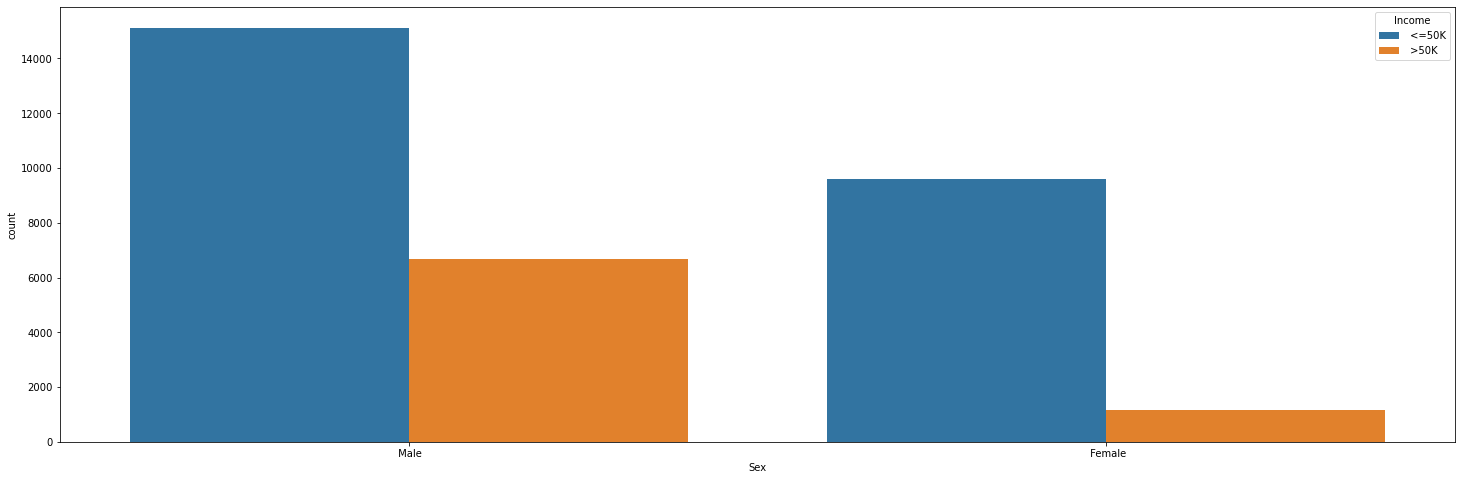

In [68]:
plt.figure(figsize=(25,8))
sns.countplot(x='Sex', hue='Income', data=df)
plt.show()

#### Now as we can see there are many categorical columns are present with more than 2 category.

## Coverting the categorical column to make it more perfect for our models.

We are converting some columns with some better options.

In [127]:
df['Marital_Status'] = df['Marital_Status'].replace({'Married-civ-spouse':'Married', 'Divorced':'Single',
                                                     'Married-spouse-absent':'Single', 'Never-married':'Single',
                                                    'Separated':'Single', 'Married-AF-spouse':'Married',
                                                    'Widowed':'Single',})

In [128]:
df['Education'] = df['Education'].replace({'Bachelors':'Graduated', 'HS-grad':'Not_Graduated', '11th':'Not_Graduated',
                                          'Masters': 'Graduated', '9th': 'Not_Graduated', 'Some-college': 'Graduated',
                                          'Assoc-acdm': 'Graduated', 'Assoc-voc': 'Graduated', '7th-8th': 'Not_Graduated',
                                          'Doctorate': 'Graduated', 'Prof-school': 'Graduated', '5th-6th': 'Not_Graduated',
                                          '10th': 'Graduated', '1st-4th': 'Not_Graduated', 'Preschool': 'Not_Graduated',
                                          '12th': 'Not_Graduated',})

In [129]:
df["Workclass"] = df["Workclass"].replace({"Private": "Paid_Employed", "Self-emp-not-inc": "Paid_Employed",
                                           "Local-gov": "Paid_Employed", "?": "Paid_Employed",
                                           "State-gov": "Paid_Employed", "Self-emp-inc": "Paid_Employed",
                                           "Federal-gov": "Paid_Employed", "Without-pay": "Unpaid_Employed",
                                           "Never-worked": "UnEmployed",})

In [130]:
# There are many values present in Native_country column. And the most entries are united states of around 27000.
# so we convert it like if the value other than united states it will show others

df['Native_country'] = np.where(df['Native_country'].str.contains("United-States"), "United-States", "Other")

In [132]:
# As we can see in Occupation column there is an entry with '?' and we don't know what it is, so we will drop that column

index_name = df[df['Occupation'] == '?'].index
df.drop(index_name, inplace=True)

In [133]:
# As we can see in Native_country column there is an entry with '?' and we don't know what it is, so we will drop that column

indexName = df[df['Native_country'] == '?'].index
df.drop(indexName, inplace=True)

In [134]:
# Now we will perform LabelEncoder with the column which have 2 value like Marital_Status, Sex and Income

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Income'] = le.fit_transform(df['Income'])

In [138]:
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])

In [143]:
# Now we will convert som categorical column with dummies variable
#dor columns 'Workclass', 'Education', 'Occupation', 'Relationship', 'Race', 'Native country'

df = pd.concat([df,pd.get_dummies(df['Workclass'],prefix='workclass')],axis=1).drop('Workclass',axis=1)
df = pd.concat([df,pd.get_dummies(df['Education'],prefix='Education')],axis=1).drop('Education',axis=1)
df = pd.concat([df,pd.get_dummies(df['Occupation'],prefix='Occupation')],axis=1).drop('Occupation',axis=1)
df = pd.concat([df,pd.get_dummies(df['Relationship'],prefix='Relationship')],axis=1).drop('Relationship',axis=1)
df = pd.concat([df,pd.get_dummies(df['Race'],prefix='Race')],axis=1).drop('Race',axis=1)
df = pd.concat([df,pd.get_dummies(df['Native_country'],prefix='Native-country')],axis=1).drop('Native_country',axis=1)

In [157]:
# In Capital_gain column 0 appears 28000 times and some various of values 
# In Capital_loss column 0 appears 29000 times and some various of values
# so to overcome from this problem we can apply standard scalar in these two columns

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Capital_gain'] = sc.fit_transform(df[['Capital_gain']].values).astype('int64')
df['Capital_loss'] = sc.fit_transform(df[['Capital_loss']].values).astype('int64')

## Checking if our data is balanced or not 

<AxesSubplot:xlabel='Income', ylabel='count'>

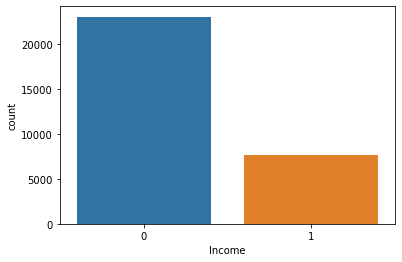

In [161]:
sns.countplot(df['Income'])

In [162]:
x = df.drop('Income', axis=1)
y= df['Income']

In [163]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 23067, 1: 7650})
Resample dataset shape Counter({0: 23067, 1: 23067})


## Model Development

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [169]:
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.33, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.8447947454844007 on Random State:  115


In [167]:
# creating train test split

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=115)

In [186]:
# By using Naive Bayes

gnb = GaussianNB()
gnb.fit(x_train, y_train)
predgnb = gnb.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, predgnb)*100))
print("f1_Score: {}".format(f1_score(y_test, predgnb)*100))
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test, predgnb))

Accuracy Score: 74.29228243021346
f1_Score: 76.80455138082255
[[4831 2770]
 [1144 6480]]
              precision    recall  f1-score   support

           0       0.81      0.64      0.71      7601
           1       0.70      0.85      0.77      7624

    accuracy                           0.74     15225
   macro avg       0.75      0.74      0.74     15225
weighted avg       0.75      0.74      0.74     15225



In [188]:
# By using Decision Tree

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
preddtc = dtc.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, preddtc)*100))
print("f1_Score: {}".format(f1_score(y_test, preddtc)*100))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

Accuracy Score: 85.17569786535304
f1_Score: 85.32986675333116
[[6404 1197]
 [1060 6564]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7601
           1       0.85      0.86      0.85      7624

    accuracy                           0.85     15225
   macro avg       0.85      0.85      0.85     15225
weighted avg       0.85      0.85      0.85     15225



In [189]:
# By using Random Forest

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predrfc = rfc.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, predrfc)*100))
print("f1_Score: {}".format(f1_score(y_test, predrfc)*100))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test, predrfc))

Accuracy Score: 88.15106732348112
f1_Score: 88.07036106335143
[[6762  839]
 [ 965 6659]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7601
           1       0.89      0.87      0.88      7624

    accuracy                           0.88     15225
   macro avg       0.88      0.88      0.88     15225
weighted avg       0.88      0.88      0.88     15225



In [191]:
# By using K nearest neughbors

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, predknn)*100))
print("f1_Score: {}".format(f1_score(y_test, predknn)*100))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

Accuracy Score: 66.50246305418719
f1_Score: 68.89864617636296
[[4476 3125]
 [1975 5649]]
              precision    recall  f1-score   support

           0       0.69      0.59      0.64      7601
           1       0.64      0.74      0.69      7624

    accuracy                           0.67     15225
   macro avg       0.67      0.66      0.66     15225
weighted avg       0.67      0.67      0.66     15225



## Checking cross validation score

In [193]:
# checking cross validation score

models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))

maxx_acc = 0
for name, model in models:
    kfold = KFold(n_splits=10)
    cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    result = cv.mean()
    print('{}: {}'.format(name, result))
    if result > maxx_acc:
        maxx_acc = result
        b_model = name
print("The best model is {} with the accuracy {:.2f}".format(b_model, maxx_acc))    

Naive Bayes: 0.7400436908908732
Decision Tree: 0.8498173526021366
Random Forest: 0.8834968312848975
KNN: 0.6526904919701105
The best model is Random Forest with the accuracy 0.88


It is clearly seen that Random forest delievers a good accuracy from all these models.

## Hyperparameter tuning

In [202]:
# creating parameter list to pass in Grid Search CV

parameter = {'n_estimators': np.arange(50, 200, 10),
            'criterion': ['gini', 'entropy'],
            'max_depth': np.arange(2,8)}

In [203]:
GCV = GridSearchCV(RandomForestClassifier(), parameter, cv=kfold)
GCV.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])})

In [204]:
# Now we will find the best parameters

GCV.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 110}

In [206]:
mod = RandomForestClassifier(criterion='gini', max_depth=7, n_estimators=110)
mod.fit(x_train, y_train)
prediction = mod.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, prediction)))

Accuracy Score: 0.8638423645320197


## Checking how much our predictions are correct

In [208]:
predictions = pd.DataFrame({'predictions': prediction, 'Real Values': y_test})
predictions

,predictions,Real Values
2143,1,1
22781,1,0
20793,1,1
13408,0,0
6460,1,1
...,...,...
6608,0,0
46047,1,1
32225,1,1
41969,1,1


## Plotting ROC AUC curve 

In [209]:
# predicting probabilities
pred_prob1 = gnb.predict_proba(x_test)
pred_prob2 = dtc.predict_proba(x_test)
pred_prob3 = knn.predict_proba(x_test)
pred_prob4 = rfc.predict_proba(x_test)

In [211]:
from sklearn.metrics import roc_curve

# roc curve for model
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr=fpr
random_prob = [0 for i in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, random_prob, pos_label=1)

In [213]:
from sklearn.metrics import roc_auc_score

# auc score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
print(auc_score1, auc_score2, auc_score3, auc_score4)

0.830514815662544 0.8517430467328193 0.725856990154137 0.9576514843203516


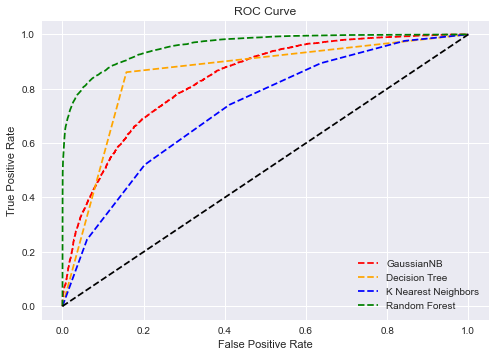

In [215]:
plt.style.use('seaborn')

# plot roc curve
plt.plot(fpr1, tpr1, linestyle='--', color='red', label='GaussianNB')
plt.plot(fpr2, tpr2, linestyle='--', color='orange', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--', color='blue', label='K Nearest Neighbors')
plt.plot(fpr4, tpr4, linestyle='--', color='green', label='Random Forest')
plt.plot(fpr, tpr, linestyle='--', color='black')

#title
plt.title('ROC Curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

## Saving the model

In [216]:
import joblib
joblib.dump(mod, 'census.pkl')

['census.pkl']

## Loading the saved model

In [217]:
model = joblib.load('census.pkl')
pred = model.predict(x_test)
print(accuracy_score(y_test, prediction))

0.8638423645320197
